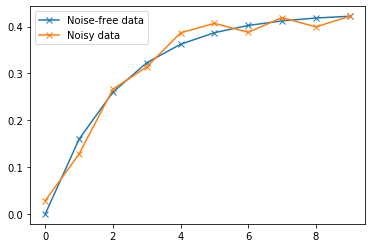

In [2]:
import pyabc
from study_abc_noise.model import ConversionReaction1dModelVars as ModelVars
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

mv = ModelVars(n_acc=10000, n_t=10)

model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists("data.dat"):
    data_nonoise, data = pickle.load(open("data.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open("data.dat", 'wb'))

plt.plot(data_nonoise['y'], 'x-', label="Noise-free data")
plt.plot(data['y'], 'x-', label="Noisy data")
plt.legend()

prior = mv.get_prior()

In [ ]:
10 * 1/0.02

In [35]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=10000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 18:32:45.047696, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 194.89910959725253
INFO:ABC:t: 0, eps: 194.89910959725253.
INFO:ABC:Acceptance rate: 10000 / 20238 = 4.9412e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 37.586615450203084.
INFO:ABC:Acceptance rate: 10000 / 20549 = 4.8664e-01, ESS=9.8069e+03.
INFO:ABC:t: 2, eps: 15.040676890332795.
INFO:ABC:Acceptance rate: 10000 / 19384 = 5.1589e-01, ESS=9.9994e+03.
INFO:ABC:t: 3, eps: 10.377074715474764.
INFO:ABC:Acceptance rate: 10000 / 20228 = 4.9436e-01, ESS=9.9972e+03.
INFO:ABC:t: 4, eps: 9.245411157274425.
INFO:ABC:Acceptance rate: 10000 / 19806 = 5.0490e-01, ESS=9.9979e+03.
INFO:ABC:t: 5, eps: 8.956315804991128.
INFO:ABC:Acceptance rate: 10000 / 20308 = 4.9242e-01, ESS=9.9952e+03.
INFO:ABC:t: 6, eps: 8.885844490163338.
INFO:ABC:Acceptance rate: 10000 / 19946 = 5.0135e-01, ESS=9.9828e+03.
INFO:ABC:t: 7, eps: 8.867109909784613.
INFO:ABC:Accept

In [36]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=10000)
abc.new("sqlite:///h_noisymodel.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 18:35:06.482267, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 203.39417430168436
INFO:ABC:t: 0, eps: 203.39417430168436.
INFO:ABC:Acceptance rate: 10000 / 20449 = 4.8902e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 49.88945911765654.
INFO:ABC:Acceptance rate: 10000 / 20580 = 4.8591e-01, ESS=9.8319e+03.
INFO:ABC:t: 2, eps: 25.401721205750807.
INFO:ABC:Acceptance rate: 10000 / 20169 = 4.9581e-01, ESS=9.8655e+03.
INFO:ABC:t: 3, eps: 18.391523683467444.
INFO:ABC:Acceptance rate: 10000 / 28686 = 3.4860e-01, ESS=8.6624e+03.
INFO:ABC:t: 4, eps: 14.422612089330414.
INFO:ABC:Acceptance rate: 10000 / 48739 = 2.0517e-01, ESS=8.1355e+03.
INFO:ABC:t: 5, eps: 11.719827736977031.
INFO:ABC:Acceptance rate: 10000 / 87976 = 1.1367e-01, ESS=7.4794e+03.
INFO:ABC:t: 6, eps: 9.7392470724725.
INFO:ABC:Acceptance rate: 10000 / 159960 = 6.2516e-02, ESS=6.3850e+03.
INFO:ABC:t: 7, eps: 8.20784316531641.
INFO:ABC:Accepta

In [29]:
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

abc = pyabc.ABCSMC(model, prior, kernel,
                   eps=temperature, acceptor=acceptor,
                   population_size=10000)
abc.new("sqlite:///h_stochasticacceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 17:41:12.916366, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=0.
INFO:ABC:t: 0, eps: 34.47543315325713.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 10000 / 33704 = 2.9670e-01, ESS=1.0000e+04.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=1.
INFO:ABC:t: 1, eps: 2.0156829659979683.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.5500e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 10000 / 33534 = 2.9820e-01, ESS=9.9567e+03.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=2.
INFO:ABC:Transition density is zero

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
I

In [37]:
def l1(x, y):
    return np.sum(np.abs(x['y'] - y['y']) / mv.noise_std)

abc = pyabc.ABCSMC(model, prior, l1, population_size=10000)
abc.new("sqlite:///h_incorrect_l1.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 18:44:26.194646, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 42.81583276431823
INFO:ABC:t: 0, eps: 42.81583276431823.
INFO:ABC:Acceptance rate: 10000 / 20213 = 4.9473e-01, ESS=1.0000e+04.
INFO:ABC:t: 1, eps: 18.301441122735334.
INFO:ABC:Acceptance rate: 10000 / 20463 = 4.8869e-01, ESS=9.8588e+03.
INFO:ABC:t: 2, eps: 10.431127192230331.
INFO:ABC:Acceptance rate: 10000 / 19464 = 5.1377e-01, ESS=9.9985e+03.
INFO:ABC:t: 3, eps: 8.597958559809049.
INFO:ABC:Acceptance rate: 10000 / 20054 = 4.9865e-01, ESS=9.9915e+03.
INFO:ABC:t: 4, eps: 8.206315198116306.
INFO:ABC:Acceptance rate: 10000 / 19761 = 5.0605e-01, ESS=9.9993e+03.
INFO:ABC:t: 5, eps: 8.111783842094157.
INFO:ABC:Acceptance rate: 10000 / 20087 = 4.9783e-01, ESS=9.9956e+03.
INFO:ABC:t: 6, eps: 8.06512112783668.
INFO:ABC:Acceptance rate: 10000 / 20211 = 4.9478e-01, ESS=9.9960e+03.
INFO:ABC:t: 7, eps: 8.04120980336776.
INFO:ABC:Acceptance 